## Quick EDA

### Importing Dependecies
----

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
pd.set_option('max_columns', None)

%matplotlib inline

### Data Read
----- 

In [3]:
df = pd.read_csv('../input/booking_com-travel_sample.csv')

### EDA
----

In [4]:
df.head()

,address,city,country,crawl_date,hotel_brand,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,locality,longitude,pageurl,property_id,property_name,property_type,province,qts,room_count,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,special_tag,state,uniq_id,zone
0,"KHIRSU, 246147 Pauri, India – Great location -",pauri,India,2016-09-01,NaN,Khirsu By GMVN offers accommodation in Pauri. ...,Bathroom:Toilet paper|Linen|Towels|Bathroom|To...,NaN,3.0,30.123749,NaN,78.793774,http://www.booking.com/hotel/in/khirsu-by-gmvn...,1742658.0,Khirsu By GMVN,204,NaN,2016-09-01 11:52:38 +0000,18.0,Economy Double Room,Hotel Mandakini,NaN,NaN,NaN,http://www.booking.com/,Share,Uttarakhand,a5ea72415f8007fcbe65759830fdd3d9,NaN
1,"Kaathadimattam, Balacola Post, NEAR Siva Tea F...",ooty,India,2016-09-01,NaN,"Situated in Ooty in the Tamil Nadu Region, 8 k...",Bathroom:Toilet paper|Linen|Towels|Bidet|Towel...,3 stars,NaN,11.329595,NaN,76.686732,http://www.booking.com/hotel/in/global-village...,1755986.0,Global Village Ooty,212,NaN,2016-09-01 11:52:38 +0000,10.0,British Empire Chalet,Treebo Yantra Leisures|Western Valley Resorts|...,5,7.6,Location:8.5|Staff:8|Cleanliness:7.5|Comfort:7...,http://www.booking.com/,Share,Tamil Nadu,7e0b055417271bbd9dae902f3e231ed4,NaN
2,"PIPALKOTI, 246472 Pīpalkoti, India – Show map",pīpalkoti,India,2016-09-01,NaN,TRH Pipalkoti offers accommodation in Pīpalkot...,Bathroom:Toilet paper|Linen|Towels|Bathroom•Vi...,NaN,4.0,30.429540,NaN,79.428116,http://www.booking.com/hotel/in/trh-pipalkoti....,1741747.0,TRH Pipalkoti,204,NaN,2016-09-01 11:52:38 +0000,28.0,Economy Double Room,TRH Joshimath (New),NaN,NaN,NaN,http://www.booking.com/,Share,Uttarakhand,72c0af09827bbb620365aa5df523ba1d,NaN
3,"1 KARIYIL HOUSE KUMARAKOM NORTH PO KOTTAYAM, 6...",kumarakom,India,2016-09-01,NaN,"Swasti house boat 2 is located in Kumarakom, 3...",Bathroom:Toilet paper|Towels|Bath|Shower•Bedro...,NaN,2.0,9.616057,NaN,76.428269,http://www.booking.com/hotel/in/swasti-house-b...,1747392.0,Swasti house boat 2,204,NaN,2016-09-01 11:52:38 +0000,1.0,Deluxe Room,NaN,NaN,NaN,NaN,http://www.booking.com/,Share,Kerala,eb6fd33d99aa4a8088caa8f3ecb08275,NaN
4,"Kavanattinkara, 686563 Kumarakom, India – Show...",kumarakom,India,2016-09-01,NaN,"Amrutham Houseboat 2 is set in Kumarakom, 5 km...",Bathroom:Toilet paper|Linen|Towels|Towels/Shee...,NaN,NaN,9.632854,NaN,76.423570,http://www.booking.com/hotel/in/amrutham-house...,1744962.0,Amrutham Houseboat 2,215,NaN,2016-09-01 11:52:38 +0000,2.0,Mobile Home,Mandala Beach House & Cottages,NaN,NaN,NaN,http://www.booking.com/,Share,Kerala,0814d9af7ad808863c04db8f30437c57,NaN


In [115]:
df.describe()

,hotel_star_rating,image_count,latitude,longitude,property_id,room_count,site_review_rating
count,3075.000000,3537.000000,6000.000000,6000.000000,5.410000e+03,5410.000000,4792.000000
mean,2.957073,24.317218,21.349458,77.184569,1.282464e+06,25.373383,7.286269
std,1.030809,11.177179,7.348339,3.990125,5.479691e+05,31.666920,1.203548
min,1.000000,1.000000,8.082004,68.963419,4.825710e+05,1.000000,3.200000
25%,2.000000,17.000000,15.007242,74.314587,5.482080e+05,10.000000,6.600000
50%,3.000000,24.000000,22.472682,76.764852,1.623448e+06,20.000000,7.400000
75%,3.000000,30.000000,28.395414,78.093757,1.691273e+06,30.000000,8.200000
max,5.000000,57.000000,34.630544,93.020060,1.851397e+06,523.000000,9.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
address                    5410 non-null object
city                       5982 non-null object
country                    6000 non-null object
crawl_date                 6000 non-null object
hotel_brand                1312 non-null object
hotel_description          5410 non-null object
hotel_facilities           5410 non-null object
hotel_star_rating          3075 non-null object
image_count                3537 non-null float64
latitude                   6000 non-null float64
locality                   529 non-null object
longitude                  6000 non-null float64
pageurl                    6000 non-null object
property_id                5410 non-null float64
property_name              5410 non-null object
property_type              6000 non-null object
province                   529 non-null object
qts                        6000 non-null object
room_count                 

In [6]:
len(df['city'].unique())

544

In [9]:
df['city'].value_counts().head()

new delhi    309
bangalore    193
mumbai       172
jaipur       163
chennai      152
Name: city, dtype: int64

In [10]:
df['hotel_star_rating'].value_counts()

3-star hotel    1148
2-star hotel     553
4-star hotel     267
3 stars          260
5-star hotel     219
4 stars          160
2 stars          152
1-star hotel     131
1 stars          100
5 stars           85
Name: hotel_star_rating, dtype: int64

In [11]:
def star_cleaning(value):
    try:
        value = list(value)[0]
        if int(value) == 3:
            return (3.0)

        elif int(value) == 2:
            return (2.0)

        elif int(value) == 1:
            return (1.0)

        elif int(value) == 4:
            return (4.0)
        else:
            return (5.0)
        
    except:
        pass

In [12]:
df['hotel_star_rating'] = df['hotel_star_rating'].apply(star_cleaning)

In [14]:
df['room_count'].describe()

count    5410.000000
mean       25.373383
std        31.666920
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       523.000000
Name: room_count, dtype: float64

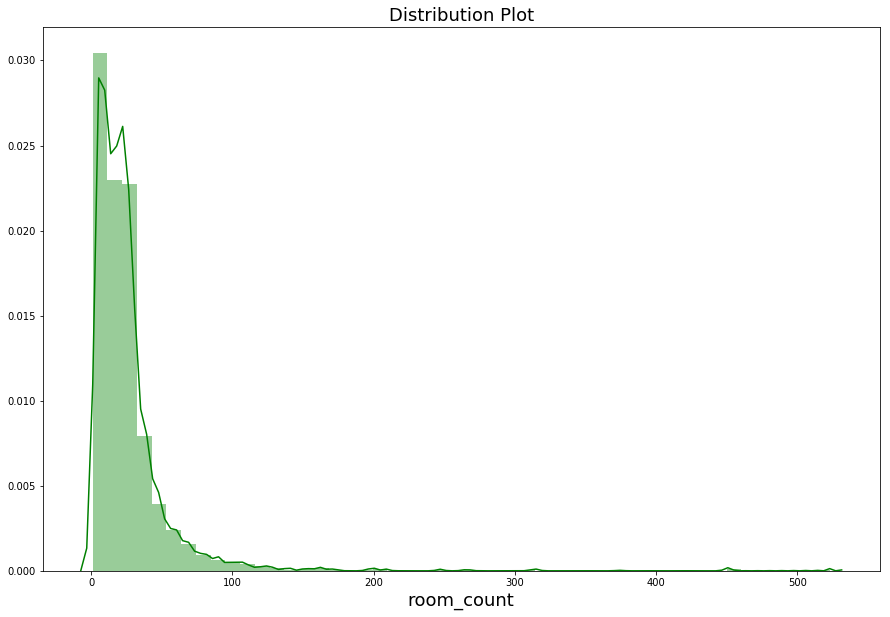

In [119]:
room_count = df['room_count']
room_count.dropna(inplace = True)
plt.figure(figsize=(15,10))
plt.title('Distribution Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.distplot(df['room_count'], color='g')

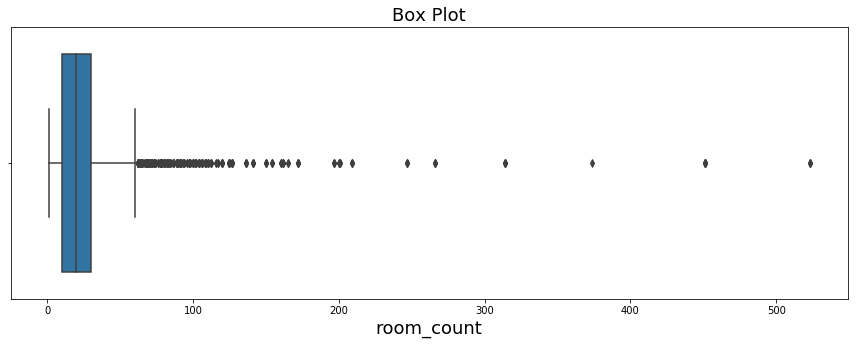

In [122]:
plt.figure(figsize=(15, 5))
plt.title('Box Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.boxplot(df['room_count'])

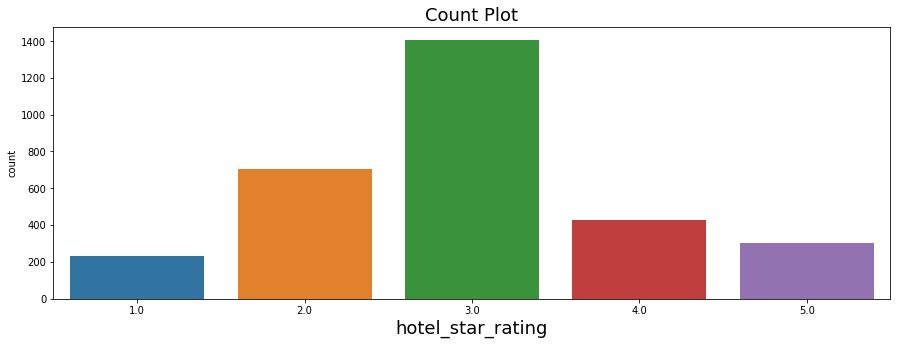

In [123]:
room_count = df['hotel_star_rating']
room_count.dropna(inplace = True)
plt.figure(figsize=(15, 5))
plt.title('Count Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.countplot(df['hotel_star_rating'])

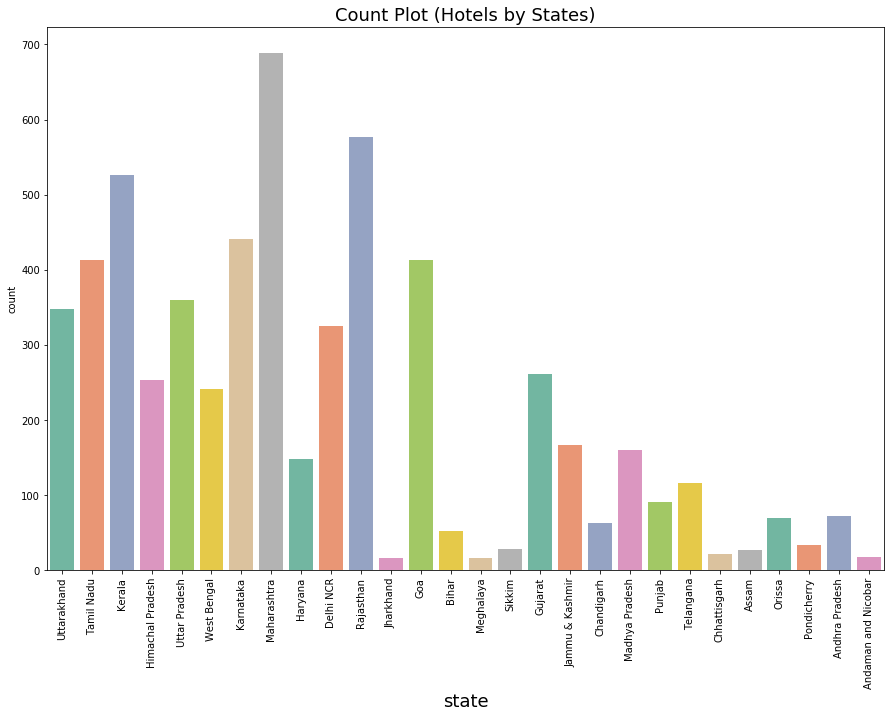

In [124]:
plt.figure(figsize = (15,10))
plt.title('Count Plot (Hotels by States)', fontsize=18)
plt.xticks(rotation = (90))
plt.xlabel('xlabel',fontsize=18)
sns.countplot(df['state'], palette="Set2")

### Text Cleaning
-----

In [18]:
df['hotel_facilities'][0].split('•')

['Bathroom:Toilet paper|Linen|Towels|Bathroom|Toilet',
 'Bedroom:Wardrobe/Closet',
 'View:Mountain view|View',
 'Room Amenities:Clothes rack',
 'Pets:Pets are not allowed.',
 'Living Area:Seating Area|Desk',
 'Media & Technology:Satellite Channels|TV',
 'Food & Drink:Breakfast in the room',
 'Internet:Free!\nWiFi is available in public areas and is free of charge.',
 'Parking:Free!\nFree public parking is possible on site (reservation is not needed).',
 'Services:Daily maid service|Shuttle service (surcharge)|Wake-up service|Car hire|Room service',
 'General:Designated smoking area|Non-smoking throughout|Tile/Marble floor|Heating|Fan|Non-smoking rooms|Newspapers']

In [19]:
df['hotel_facilities'][0].split('•')[1].split('|')

['Bedroom:Wardrobe/Closet']

In [21]:
' '.join(list(itertools.chain.from_iterable([re.sub(r'[^\w\s]',' ',x.replace(':', ' ').lower().strip()).split('|') for x in df['hotel_facilities'][10].split('•')]))).replace('\n','')

'parking free free private parking is possible on site  reservation is not needed   internet free wifi is available in all areas and is free of charge  kitchen dining table cleaning products stovetop oven refrigerator bedroom wardrobe closet bathroom towels free toiletries toilet paper linen shared toilet bathroom toilet shared bathroom living area dining area seating area media   technology satellite channels tv room amenities private entrance interconnected room s  available pets pets are not allowed  accessibility upper floors accessible by stairs only outdoors balcony terrace food   drink grocery deliveries breakfast in the room activities hiking fishing building characteristics private flat in building transport airport shuttle  surcharge  shuttle service  surcharge  car hire bicycle rental outdoor   view city view mountain view view entertainment and family services baby safety gates miscellaneous family rooms languages spoken'

In [23]:
def one_liner(val):
    try:
        return(' '.join(list(itertools.chain.from_iterable([re.sub(r'[^\w\s]',' ',x.replace(':', ' ').lower().strip()).split('|') for x in val.split('•')]))).replace('\n',''))
    except:
        pass
    

In [ ]:
df['hotel_facilities_wc'] = df['hotel_facilities'].apply(one_liner)

### Word Cloud Generation
-----

In [54]:
wl = []
for hotel_fac in list(filter(None, df['hotel_facilities_wc'])):
    wl.append(hotel_fac)

In [91]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='White', max_words=50 ,collocations=False).generate(' '.join(wl))

(-0.5, 399.5, 199.5, -0.5)

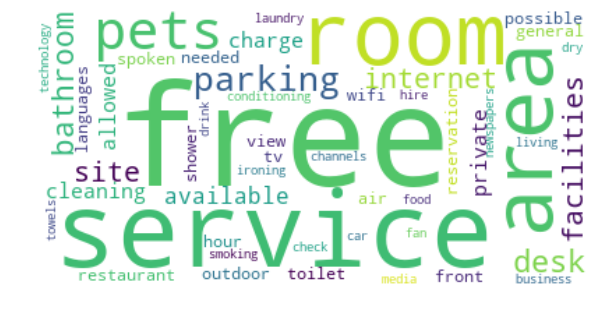

In [92]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")